<a href="https://colab.research.google.com/github/priyadarshpv/EDA_IMDB_TOP_2000MOVIES/blob/main/EDA_IMDB_Top_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Importing

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data sets/imdb_top_2000_movies.csv')
df

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross
0,The Godfather,1972,175,9.2,100.0,"2,002,655","Crime, Drama",Francis Ford Coppola,Marlon Brando,$134.97M
1,The Godfather Part II,1974,202,9.0,90.0,"1,358,608","Crime, Drama",Francis Ford Coppola,Al Pacino,$57.30M
2,Ordinary People,1980,124,7.7,86.0,"56,476",Drama,Robert Redford,Donald Sutherland,$54.80M
3,Lawrence of Arabia,1962,218,8.3,100.0,"313,044","Adventure, Biography, Drama",David Lean,Peter O'Toole,$44.82M
4,Straw Dogs,1971,113,7.4,73.0,"64,331","Crime, Drama, Thriller",Sam Peckinpah,Dustin Hoffman,NaN
...,...,...,...,...,...,...,...,...,...,...
1995,The Young Victoria,2009,105,7.2,64.0,"66,235","Biography, Drama, History",Jean-Marc Vallée,Emily Blunt,$11.00M
1996,Tooth Fairy,I 2010,101,5.0,36.0,"49,527","Comedy, Family, Fantasy",Michael Lembeck,Dwayne Johnson,$60.02M
1997,The Informant!,2009,108,6.5,66.0,"67,318","Biography, Comedy, Crime",Steven Soderbergh,Matt Damon,$33.31M
1998,Youth in Revolt,2009,90,6.4,63.0,"75,956","Comedy, Drama, Romance",Miguel Arteta,Michael Cera,$15.28M


In [ ]:
df.dtypes

,0
Movie Name,object
Release Year,object
Duration,int64
IMDB Rating,float64
Metascore,float64
Votes,object
Genre,object
Director,object
Cast,object
Gross,object


#Data Preprocessing

Data cleaning

In [ ]:
df.isna().sum()

,0
Movie Name,0
Release Year,0
Duration,0
IMDB Rating,0
Metascore,81
Votes,0
Genre,0
Director,0
Cast,0
Gross,97


In [ ]:
df.dropna(inplace=True)

Data type conversion

In [ ]:
df['Release Year'] = df['Release Year'].str.strip('I -').astype('int')

In [ ]:
df['Votes']=df['Votes'].str.replace(',','').astype(float)

In [ ]:
df['Gross'] = df['Gross'].astype(str)

In [ ]:
def convert_to_number(value):
    value = value.replace('$', '')
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6
    elif 'B' in value:
        return float(value.replace('B', '')) * 1e9
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3
    else:
        return float(value)

In [ ]:
df['Gross'] = df['Gross'].apply(convert_to_number)

In [ ]:
df['Gross'] = df['Gross'].astype(float)

Duplicates Removal

In [ ]:
df.duplicated().sum()

0

Feature Engineering

In [ ]:
df['single_genre']=df['Genre'].apply(lambda x:x.split(',')[0])

In [ ]:
df['Type']=df['Release Year'].apply(lambda x:'latest movie' if x>2005 else 'Old movies')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1870 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    1870 non-null   object 
 1   Release Year  1870 non-null   int64  
 2   Duration      1870 non-null   int64  
 3   IMDB Rating   1870 non-null   float64
 4   Metascore     1870 non-null   float64
 5   Votes         1870 non-null   float64
 6   Genre         1870 non-null   object 
 7   Director      1870 non-null   object 
 8   Cast          1870 non-null   object 
 9   Gross         1870 non-null   float64
 10  single_genre  1870 non-null   object 
 11  Type          1870 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 189.9+ KB


#EDA

In [ ]:
df.describe()

,Release Year,Duration,IMDB Rating,Metascore,Votes,Gross
count,1870.000000,1870.000000,1870.000000,1870.000000,1.870000e+03,1.870000e+03
mean,1997.068984,114.021925,6.917701,60.604813,2.324929e+05,6.705605e+07
std,13.092585,22.111954,0.910489,17.811494,2.832883e+05,7.310608e+07
min,1927.000000,64.000000,2.400000,9.000000,7.442000e+03,0.000000e+00
25%,1993.000000,98.000000,6.400000,48.000000,8.340525e+04,1.861500e+07
50%,2001.000000,110.000000,7.000000,61.000000,1.409245e+05,4.575000e+07
75%,2006.000000,125.000000,7.600000,73.000000,2.624302e+05,8.844500e+07
max,2010.000000,238.000000,9.300000,100.000000,2.875249e+06,7.605100e+08


In [ ]:
df[df['Gross']==760510000.0]

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,single_genre,Type
1763,Avatar,2009,162,7.9,83.0,1382286.0,"Action, Adventure, Fantasy",James Cameron,Sam Worthington,760510000.0,Action,latest movie


In [ ]:
df[df['Gross']==0.0]

,Movie Name,Release Year,Duration,IMDB Rating,Metascore,Votes,Genre,Director,Cast,Gross,single_genre,Type
1682,The Condemned,2007,114,6.0,23.0,54220.0,"Action, Crime, Thriller",Scott Wiper,Steve Austin,0.0,Action,latest movie


In [ ]:
df[['Movie Name','Votes']][df['Votes'].isin([df['Votes'].min(), df['Votes'].max()])]

,Movie Name,Votes
123,Camelot,7442.0
506,The Shawshank Redemption,2875249.0


In [ ]:
df[['Movie Name','Gross']][df['Gross'].isin([df['Gross'].min(), df['Gross'].max()])]

,Movie Name,Gross
1682,The Condemned,0.0
1763,Avatar,760510000.0


In [ ]:
df[['Movie Name','Release Year']][df['Release Year'].isin([df['Release Year'].min()])]

,Movie Name,Release Year
208,Metropolis,1927


In [ ]:
df[['Movie Name', 'Director','Cast', 'Gross']].nlargest(10, 'Gross')

,Movie Name,Director,Cast,Gross
1763,Avatar,James Cameron,Sam Worthington,760510000.0
511,Titanic,James Cameron,Leonardo DiCaprio,659330000.0
1508,The Dark Knight,Christopher Nolan,Christian Bale,534860000.0
764,Star Wars: Episode I - The Phantom Menace,George Lucas,Ewan McGregor,474540000.0
1076,Shrek 2,Andrew Adamson,Kelly Asbury,436470000.0
350,E.T. the Extra-Terrestrial,Steven Spielberg,Henry Thomas,435110000.0
1263,Pirates of the Caribbean: Dead Man's Chest,Gore Verbinski,Johnny Depp,423320000.0
516,The Lion King,Roger Allers,Rob Minkoff,422780000.0
1797,Toy Story 3,Lee Unkrich,Tom Hanks,415000000.0
1012,Spider-Man,Sam Raimi,Tobey Maguire,403710000.0


In [ ]:
df[['Movie Name', 'Director','Cast', 'Votes']].nlargest(10, 'Votes')

,Movie Name,Director,Cast,Votes
506,The Shawshank Redemption,Frank Darabont,Tim Robbins,2875249.0
1508,The Dark Knight,Christopher Nolan,Christian Bale,2857781.0
1755,Inception,Christopher Nolan,Leonardo DiCaprio,2538581.0
863,Fight Club,David Fincher,Brad Pitt,2311174.0
568,Forrest Gump,Robert Zemeckis,Tom Hanks,2245598.0
580,Pulp Fiction,Quentin Tarantino,John Travolta,2209021.0
757,The Matrix,Lana Wachowski,Lilly Wachowski,2043258.0
0,The Godfather,Francis Ford Coppola,Marlon Brando,2002655.0
1018,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,Elijah Wood,1998243.0
1019,The Lord of the Rings: The Return of the King,Peter Jackson,Elijah Wood,1970311.0


In [ ]:
df[['Movie Name', 'Director','Cast', 'IMDB Rating']].nlargest(10, 'IMDB Rating')

,Movie Name,Director,Cast,IMDB Rating
506,The Shawshank Redemption,Frank Darabont,Tim Robbins,9.3
0,The Godfather,Francis Ford Coppola,Marlon Brando,9.2
1,The Godfather Part II,Francis Ford Coppola,Al Pacino,9.0
36,12 Angry Men,Sidney Lumet,Henry Fonda,9.0
513,Schindler's List,Steven Spielberg,Liam Neeson,9.0
1019,The Lord of the Rings: The Return of the King,Peter Jackson,Elijah Wood,9.0
1508,The Dark Knight,Christopher Nolan,Christian Bale,9.0
580,Pulp Fiction,Quentin Tarantino,John Travolta,8.9
1018,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,Elijah Wood,8.9
15,"Il buono, il brutto, il cattivo",Sergio Leone,Clint Eastwood,8.8


In [ ]:
df[['Movie Name', 'Director','Cast', 'Metascore']].nlargest(100, 'Metascore')

,Movie Name,Director,Cast,Metascore
0,The Godfather,Francis Ford Coppola,Marlon Brando,100.0
3,Lawrence of Arabia,David Lean,Peter O'Toole,100.0
12,Notorious,Alfred Hitchcock,Cary Grant,100.0
20,Vertigo,Alfred Hitchcock,James Stewart,100.0
27,Rear Window,Alfred Hitchcock,James Stewart,100.0
...,...,...,...,...
1213,Gosford Park,Robert Altman,Maggie Smith,90.0
1310,The Queen,Stephen Frears,Helen Mirren,90.0
1315,The Incredibles,Brad Bird,Craig T. Nelson,90.0
1706,Once,John Carney,Glen Hansard,90.0


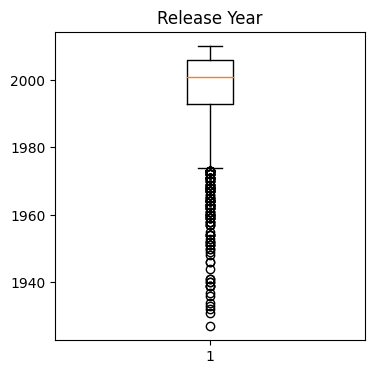

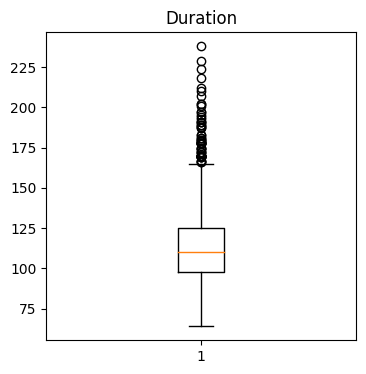

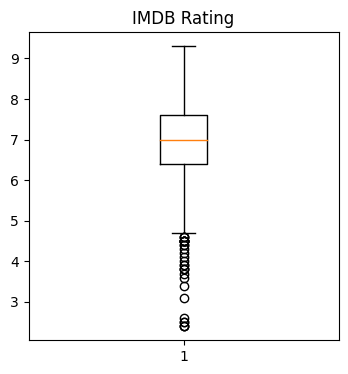

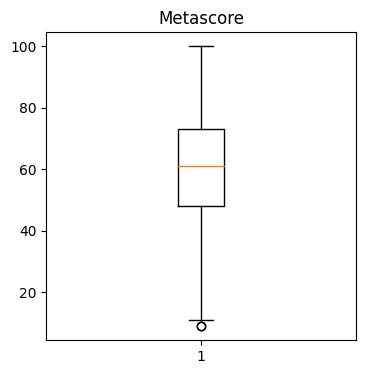

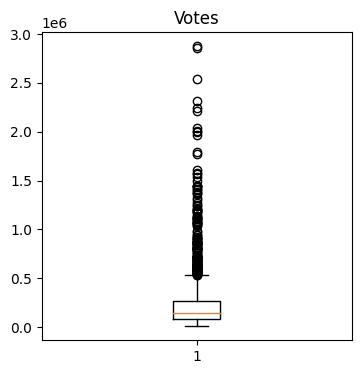

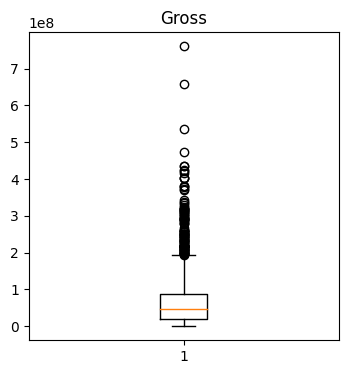

In [ ]:
for i in df:
  if df[i].dtype=='int' or df[i].dtype=='float':
    plt.figure(figsize=(4,4))
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

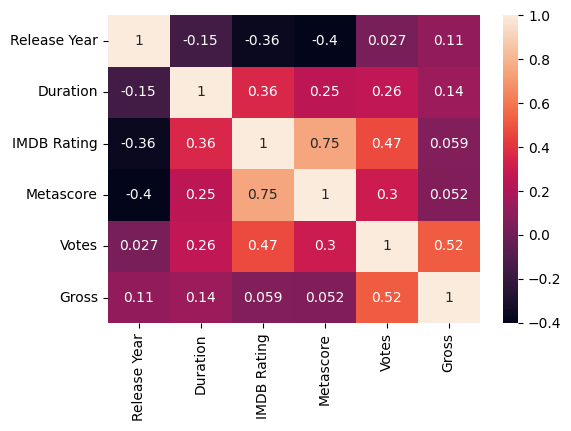

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [ ]:
for i in df:
  if df[i].dtype=='object':
    print(df[i].value_counts())
    print('--------------------------------')

Movie Name
Robin Hood                  2
Notorious                   2
Crash                       2
Friday the 13th             2
King Kong                   2
                           ..
Little Women                1
Clear and Present Danger    1
The Client                  1
Rudy                        1
Quarantine                  1
Name: count, Length: 1854, dtype: int64
--------------------------------
Genre
Comedy, Drama, Romance          92
Comedy                          60
Animation, Adventure, Comedy    58
Comedy, Romance                 55
Drama, Romance                  54
                                ..
Action, Family, Sport            1
Comedy, Family, Sci-Fi           1
Comedy, Drama, History           1
Drama, History, War              1
Action, Drama, Fantasy           1
Name: count, Length: 258, dtype: int64
--------------------------------
Director
Steven Spielberg     22
Ridley Scott         14
Tim Burton           13
Clint Eastwood       13
Robert Zemeckis   

Plotting

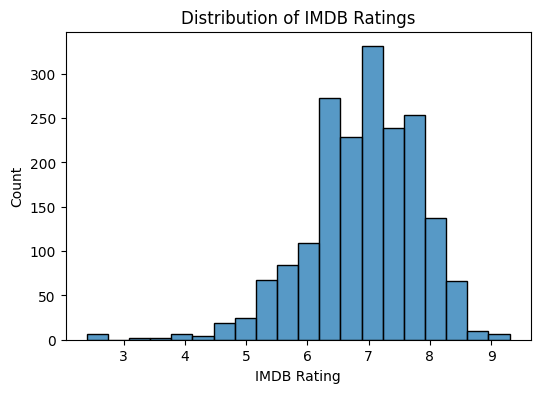

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['IMDB Rating'], bins=20,)
plt.title('Distribution of IMDB Ratings')
plt.show()


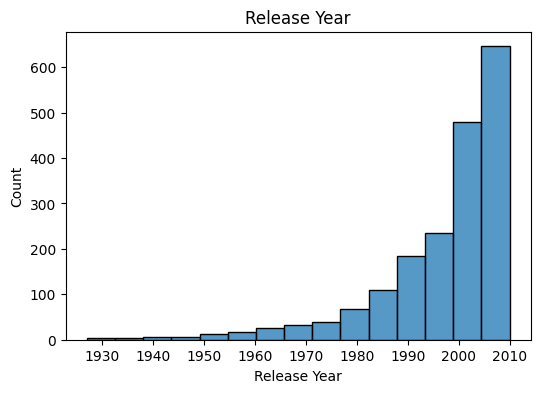

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Release Year'], bins=15,)
plt.title('Release Year')
plt.xticks(range(1930,2020,10))
plt.show()

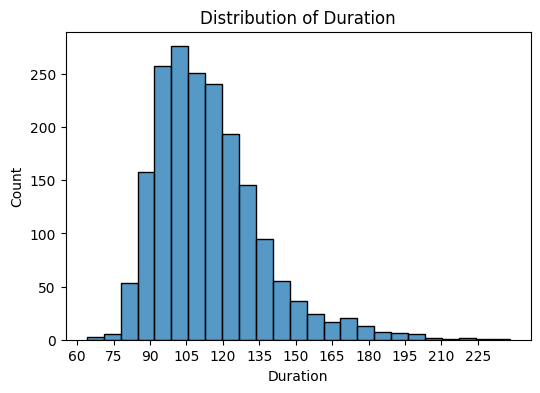

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Duration'], bins=25,)
plt.title('Distribution of Duration')
plt.xticks(range(60,240,15))
plt.show()

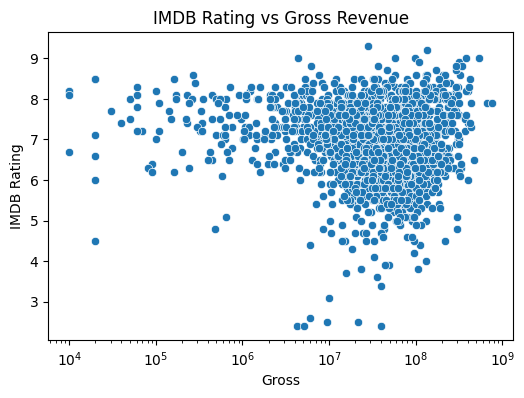

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(y='IMDB Rating', x='Gross', data=df)
plt.title('IMDB Rating vs Gross Revenue')
plt.xscale('log')
plt.show()

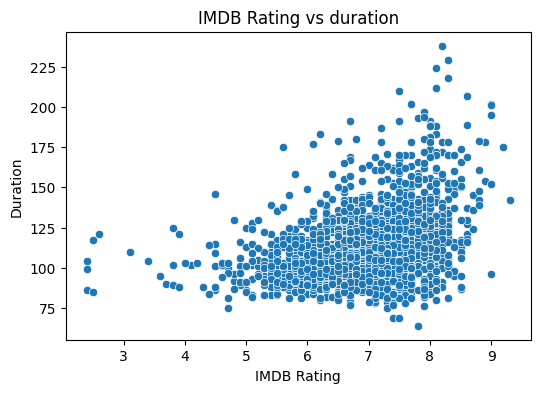

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='IMDB Rating', y='Duration', data=df)
plt.title('IMDB Rating vs duration')
plt.show()

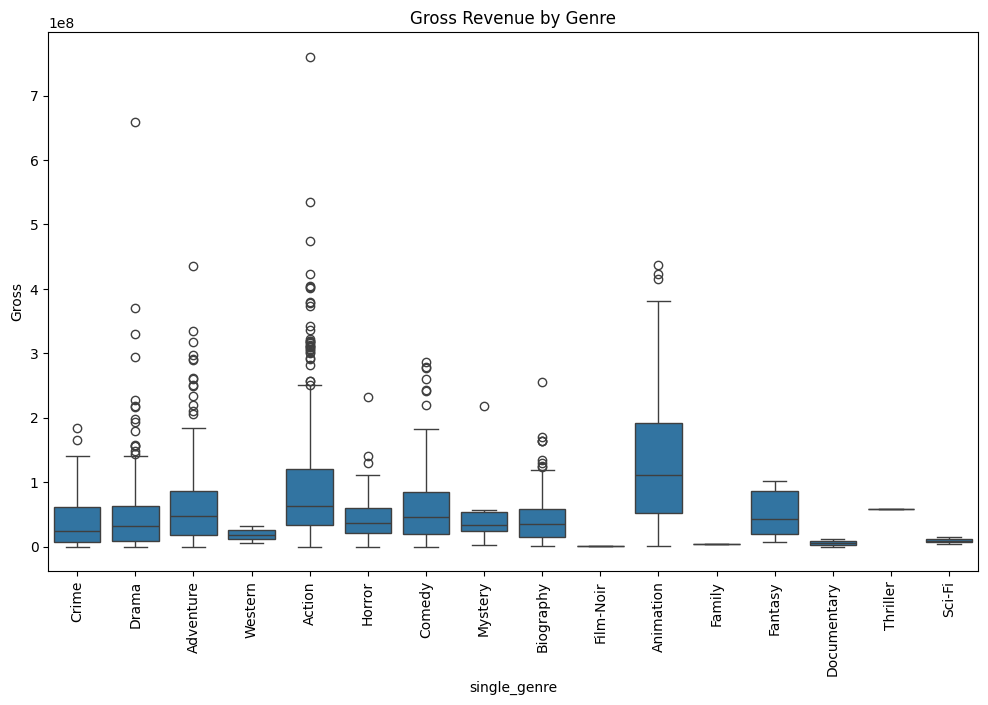

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='single_genre', y='Gross', data=df)
plt.xticks(rotation=90)
plt.title('Gross Revenue by Genre')
plt.show()

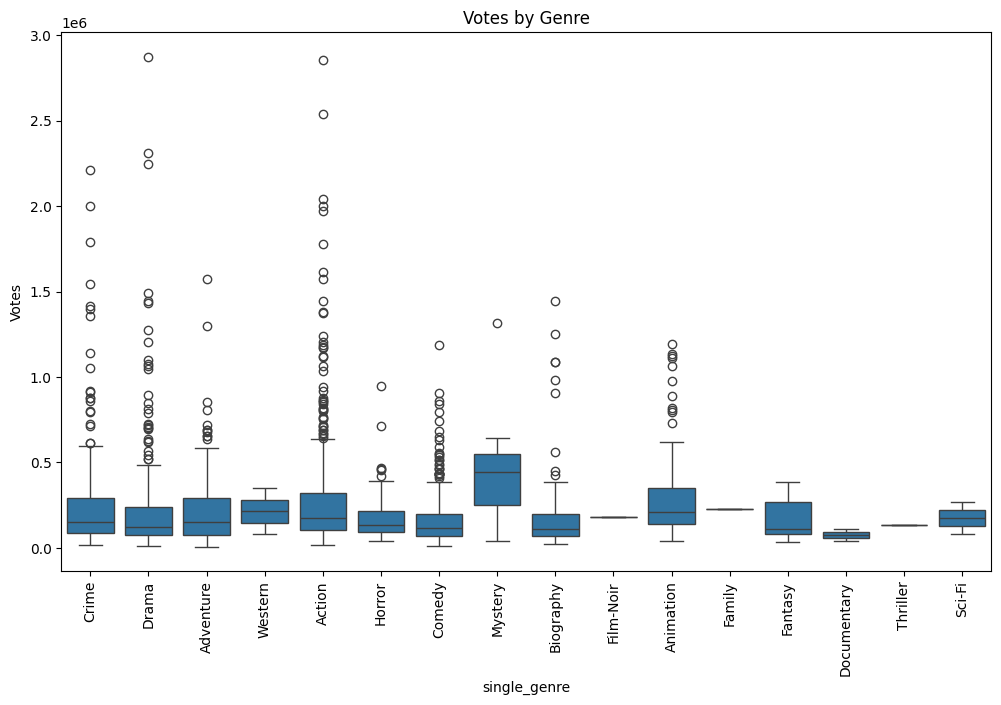

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='single_genre', y='Votes', data=df)
plt.xticks(rotation=90)
plt.title('Votes by Genre')
plt.show()

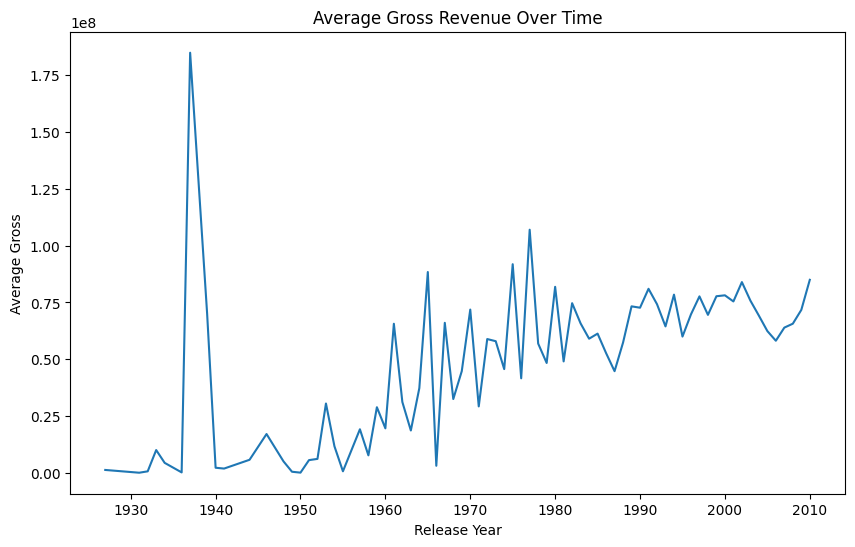

In [ ]:
avg_gross_per_year = df.groupby('Release Year')['Gross'].mean()
plt.figure(figsize=(10, 6))
avg_gross_per_year.plot()
plt.title('Average Gross Revenue Over Time')
plt.xlabel('Release Year')
plt.xticks(range(1930,2020,10))
plt.ylabel('Average Gross')
plt.show()

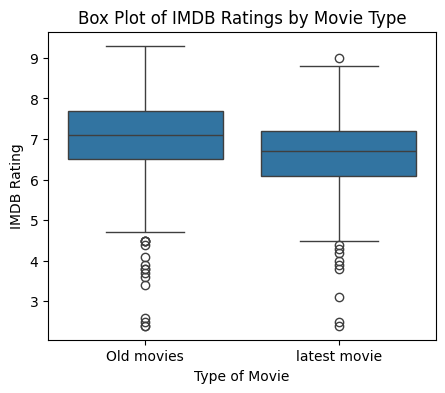

In [ ]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Type', y='IMDB Rating')
plt.title('Box Plot of IMDB Ratings by Movie Type')
plt.xlabel('Type of Movie')
plt.ylabel('IMDB Rating')
plt.show()

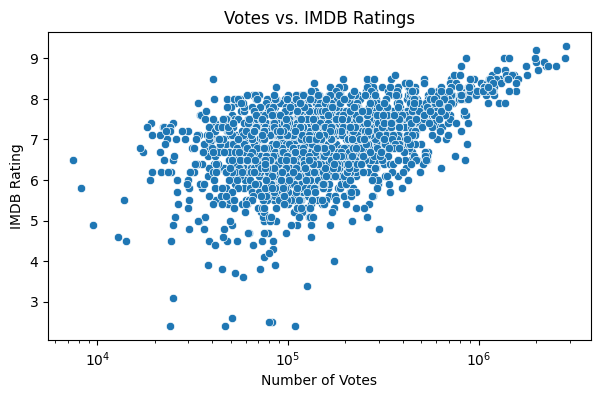

In [ ]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='Votes', y='IMDB Rating')
plt.title('Votes vs. IMDB Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('IMDB Rating')
plt.xscale('log')
plt.show()

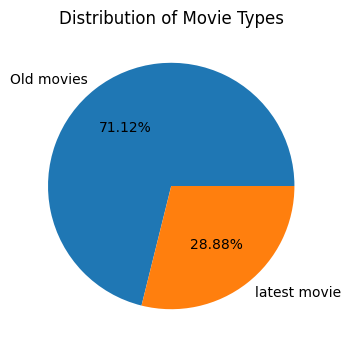

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(df['Type'].value_counts(), labels=df['Type'].unique(), autopct='%1.2f%%')
plt.title('Distribution of Movie Types')
plt.show()